# TP2
## a) Let’s consider the signal  x(t)=5*cos (628*t)
### i. Calculate the period in second [s]

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
period = (2 * np.pi) / np.abs(628)
print(f"Period: {period} seconds")

Period: 0.010005072145190424 seconds


### ii. Calculate the frequency in Hertz [Hz]

In [11]:
frequency = 1 / period
print(f"Frequency: {frequency} Hertz")



Frequency: 99.94930426171027 Hertz


### iii. Calculate the angular frequency in radian-per-second [rad/s]

In [12]:
angular_frequency = 2 * np.pi * frequency
print(f"Angular frequency: {angular_frequency} rad/s")

Angular frequency: 628.0 rad/s


### iv. What is the magnitude of this cosine?

In [13]:
x = np.linspace(0, 10, 10)
y = 5 * np.cos(628 * x)
magnitude = max(y)
print(f"Magnitude: {magnitude}")

Magnitude: 5.0


### v. What is the phase of this cosine?

#### Il n'y à pas de phase

## b) Let’s consider the above signal sampled with the sampling frequency  F_s=1kHz over 10 seconds
### i. What is the resulting length N of this signal? (i.e. how many samples?)

In [40]:
fs = 1000
samples = fs * 10
print(f"Samples: {samples}")

Samples: 10000


### ii. Construct the time axis t (from 0 to 10s)

In [20]:
x = np.linspace(0, 10, samples)

### iii. Plot the signal in the time domain (i.e.  x versus t)

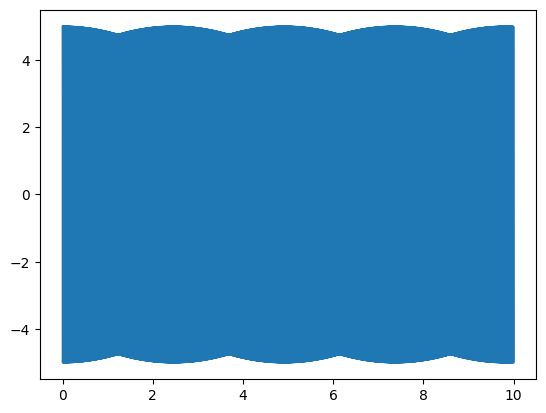

In [24]:
y = 5 * np.cos(628 * x)
plt.plot(x, y)
plt.show()

### iv. Inspect the time domain signal to measure the period of the signal (use close-ups to investigate closely the signal). Is it the same as the once calculated in a)?

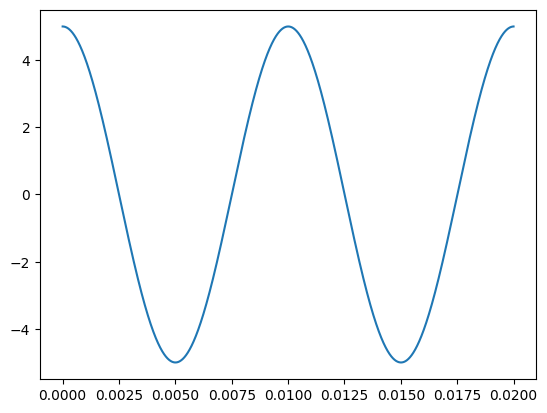

In [27]:
x2 = np.linspace(0, 0.02, samples)
y = 5 * np.cos(628 * x2)
plt.plot(x2, y)
plt.show()

#### On retrouve bien la même période que celle calculé en a) : ≈ 0.01

## c) Frequency domain analysis
### i. What is the frequency resolution Δf of the signal? 

In [28]:
frequency_resolution = 1000 / samples
print(f"Frequency resolution: {frequency_resolution} Hz")

Frequency resolution: 0.1 Hz


### ii. Define a function “discrete_Fourrier_Transform()”, that takes as an input a signal and the sampling frequency, and returns as output its discrete Fourier transform X_k and the frequency axis f.

In [43]:
def discrete_fourrier_transform(signal, fs):
    fourier = []
    for k in range(fs * 10):
        xk = 0
        for i in range(fs * 10):
            xk += signal[i] * np.exp(-2 * np.pi * 1j * i * k / (fs * 10))
        fourier.append(xk)
    return fourier

### iii. Sketch the real part and imaginary part of X_k in two different plots with respect to the frequency axis f. Comment the result (the position of the harmonics, their amplitude, etc.).

In [47]:
fourrier = discrete_fourrier_transform(y, fs)

In [48]:
fourrier_r = []
fourrier_i = []
for i in range(len(fourrier)):
    fourrier_r.append(abs(fourrier[i].real))
    fourrier_i.append(abs(fourrier[i].imag))

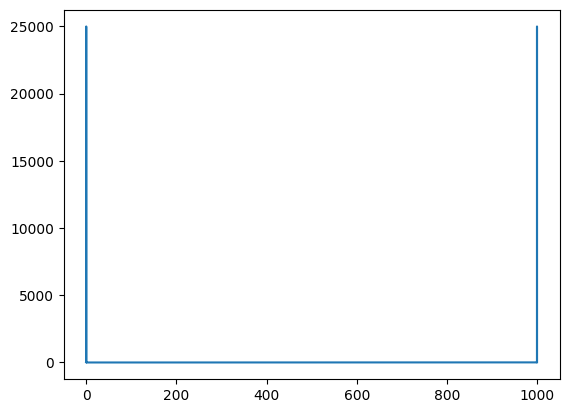

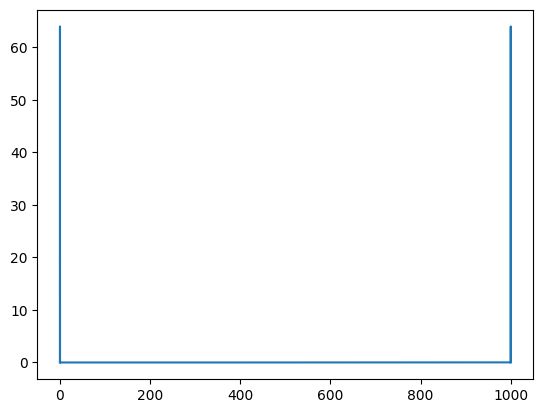

In [49]:
x_res = np.linspace(0, 1000, samples)
plt.plot(x_res, fourrier_r)
plt.show()
plt.plot(x_res, fourrier_i)
plt.show()